In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
features = pd.read_csv("C:/Users/lydia/Downloads/AI-class-main/AI-class-main/titanic.csv", index_col = 0)
# C:/USers/GC/ : 파일이 저장된 디렉토리 위치, 각자에 맞게 수정

In [3]:
features

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
features.shape

(891, 11)

In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
# 결측치 제거
features.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
features.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
def bar_chart(feature):
    survived = features[features['Survived']==1][feature].value_counts()
    dead = features[features['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))
    

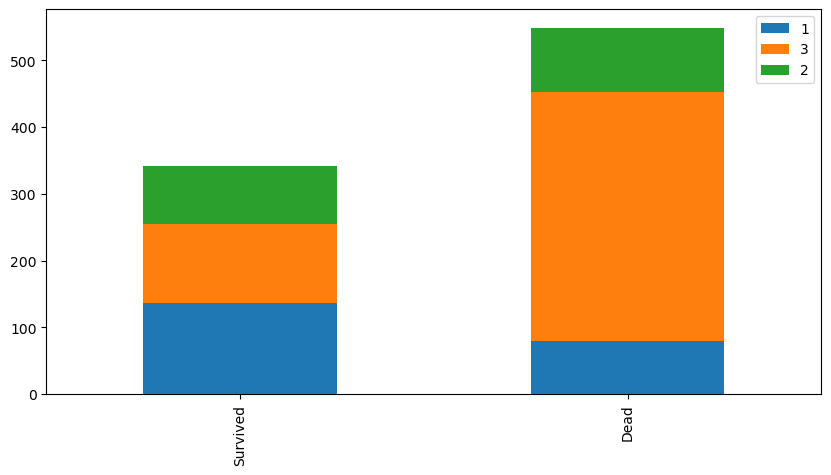

In [9]:
# 1. Plass 레이블별 갯수 및 차트표시
features['Pclass'].value_counts()
bar_chart('Pclass')

Text(0.5, 1.0, 'Count plot - Titanic Survived')

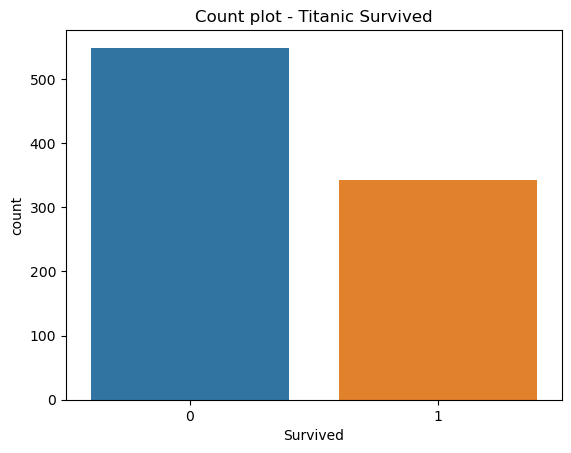

In [10]:
# 2. 생존자와 사망자 총 숫자 및 차트표시
features['Survived'].value_counts()

import matplotlib.pyplot as plt
sns.countplot(data = features, x="Survived")
plt.xlabel("Survived")
plt.title("Count plot - Titanic Survived")

C:\Users\lydia\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\lydia\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\lydia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


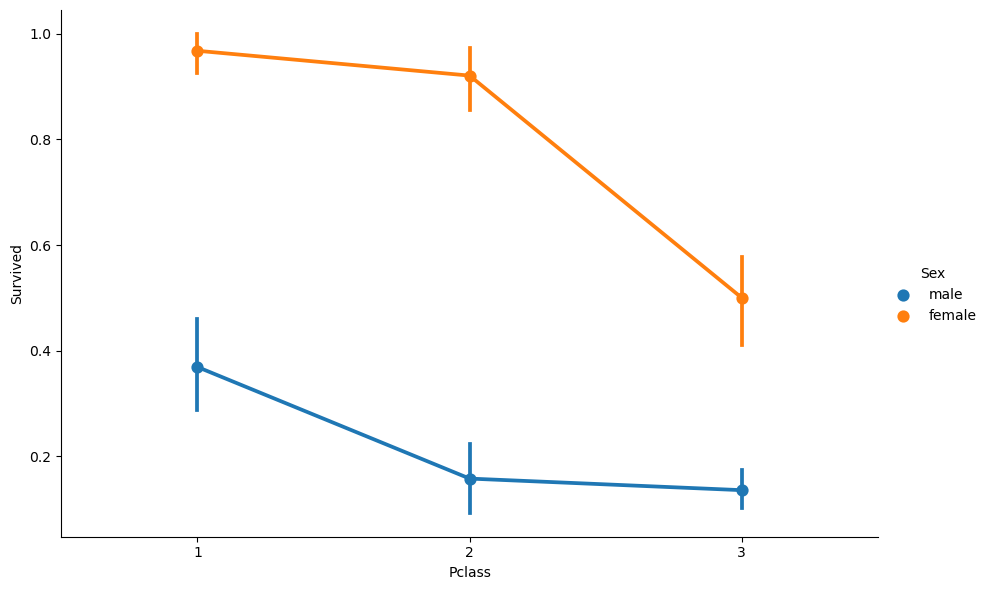

In [11]:
# 3. 성별, 티켓클래스(Pclass), 생존여부(Survived) 상관관계 분석
sns.factorplot('Pclass','Survived', hue='Sex', data=features, size=6, aspect=1.5)

In [12]:
X=features.drop('Survived',axis=1)
X.head()

y=features['Survived']
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
features_data = [features]

# 정규 표현식으로 [문자]. 으로 끝나는 문자열 추출
for dataset in features_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-za-z]+)\.', expand=False)

In [14]:
features['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [15]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                "Master":3, "Dr":3, "Rev":3, "Col": 3, 'Ms': 3, 'Mlle': 3, "Major": 3, 'Lady': 3, 'Capt': 3,
                 'Sir': 3, 'Don': 3, 'Mme':3, 'Jonkheer': 3, 'Countess': 3 }
for dataset in features_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [16]:
features.drop('Name', axis=1, inplace=True)

In [17]:
sex_mapping = {'male':0, 'female':1}
for dataset in features_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [18]:
features['Age'].fillna(features.groupby('Title')['Age'].transform('median'), inplace=True)

In [19]:
feature_drop = ['Cabin', 'Ticket', 'SibSp', 'Parch', 'Embarked']
features = features.drop(feature_drop, axis=1)

In [20]:
features

,Survived,Pclass,Sex,Age,Fare,Title
PassengerId,,,,,,
1,0,3,0,22.0,7.2500,0
2,1,1,1,38.0,71.2833,2
3,1,3,1,26.0,7.9250,1
4,1,1,1,35.0,53.1000,2
5,0,3,0,35.0,8.0500,0
...,...,...,...,...,...,...
887,0,2,0,27.0,13.0000,3
888,1,1,1,19.0,30.0000,1
889,0,3,1,21.0,23.4500,1


In [21]:
X=features.drop('Survived',axis=1)

y=features['Survived']
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [22]:
features.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Title       0
dtype: int64

In [23]:
df1= features.astype(dtype='int64',errors='ignore')

In [24]:
df1.dtypes

Survived    int64
Pclass      int64
Sex         int64
Age         int64
Fare        int64
Title       int64
dtype: object

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [27]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.7174887892376681
[[132   7]
 [ 56  28]]


In [28]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7713004484304933
[[111  28]
 [ 23  61]]


In [29]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.7982062780269058
[[115  24]
 [ 21  63]]


C:\Users\lydia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [30]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.7623318385650224
[[116  23]
 [ 30  54]]


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.8475336322869955
[[127  12]
 [ 22  62]]


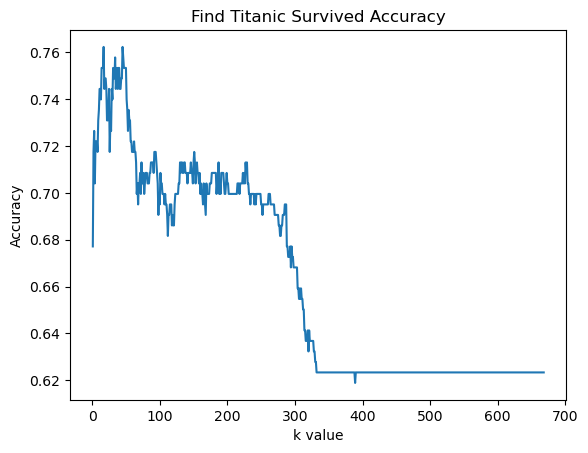

In [32]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

k_range = range(1, 669)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(X_train, y_train.values.ravel())

  find_accuracy.append(find_model.score(X_test, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find Titanic Survived Accuracy")
plt.show()

In [33]:
# Survived를 타겟 레이블로 삼아서 EDA 수행
# 1. Plass 레이블별 갯수 및 차트표시

# 3. 성별, 티켓클래스(Pclass), 생존여부(Survived) 상관관계 분석
# 4. X_train, y_ytrain, X_test, y_test로 나누고 생존여부(Survived)에 따라 각각 분류(SVM, LR, DT, RT, KNN) 숳ㅇ
